In [1]:
import sys
sys.path.append('..')

In [2]:
from nbhd import data

In [3]:
db = data.Base()

Initializing database connection...
Database connected!


In [4]:
britain = db.query('SELECT * FROM isles LIMIT 1', spatial=True)

<AxesSubplot:>

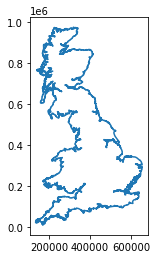

In [5]:
britain.geometry.boundary.plot()

In [7]:
road_counts = db.count('roads', 'road_function')

In [12]:
road_counts.sort_values('counts')

,counts
Motorway,7124
Local Access Road,45307
Secondary Access Road,133522
B Road,159415
A Road,285536
Minor Road,676167
Restricted Local Access Road,803087
Local Road,1650781


In [13]:
major_roads = ('Motorway', 'A Road', 'B Road', 'Minor Road')

In [14]:
roads = dict()

In [15]:
for r in major_roads:
    roads[r] = db.query(f'''SELECT geometry FROM roads 
                     WHERE roads.road_function = '{r}'
                     ''',
                     spatial=True)

<AxesSubplot:>

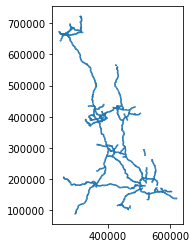

In [16]:
roads['Motorway'].plot()

<AxesSubplot:>

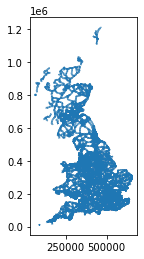

In [17]:
roads['A Road'].plot()

<AxesSubplot:>

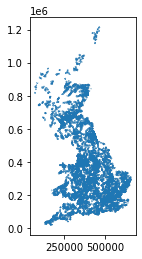

In [18]:
roads['B Road'].plot()

<AxesSubplot:>

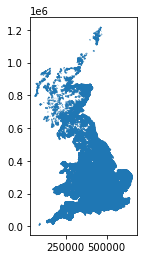

In [19]:
roads['Minor Road'].plot()

In [21]:
from nbhd.geometry import tessellate

In [23]:
from mapclassify import greedy

In [28]:
tiles1 = tessellate([britain.geometry.boundary, roads['Motorway']])

In [30]:
tiles1['c'] = greedy(tiles1)

<AxesSubplot:>

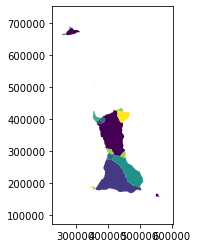

In [31]:
tiles1.plot('c')

In [42]:
tiles1.to_postgis('tiles1', db.engine, if_exists='replace')

In [35]:
tiles2 = tessellate([britain.geometry.boundary, roads['Motorway'], roads['A Road']])

In [36]:
tiles2['c'] = greedy(tiles2)

<AxesSubplot:>

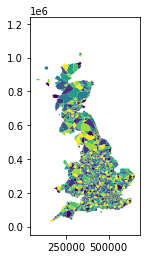

In [37]:
tiles2.plot('c')

In [41]:
tiles2.to_postgis('tiles2', db.engine, if_exists='replace')

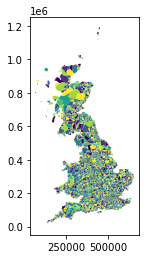

In [38]:
tiles3 = tessellate([britain.geometry.boundary, roads['Motorway'], 
                     roads['A Road'], roads['B Road']])
tiles3['c'] = greedy(tiles3)
tiles3.plot('c')
tiles3.to_postgis('tiles3', db.engine, if_exists='replace')

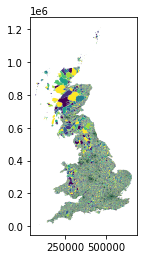

In [40]:
tiles4 = tessellate([britain.geometry.boundary, roads['Motorway'], 
                     roads['A Road'], roads['B Road'],
                    roads['Minor Road']])
tiles4['c'] = greedy(tiles4)
tiles4.plot('c')
tiles4.to_postgis('tiles4', db.engine, if_exists='replace')